# Phase II: Data Preparation & EDA

### GOALS:
- make a brief literature/industry research to determine similar projects to their project,
- learn from those studies’ outcomes and differentiate their project than others,
- plan and document the details of the planned implementation 
- get familiar with their datasets and carry out transformations and cleansing, if necessary, and 
- carry out some basic exploratory data analysis on their data sets.
- communicate/document the EDA results with visualizations

# IMPORTS

In [77]:
import os
import pandas as pd
import numpy as np
import requests
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# SETUP
Get file path

In [78]:
current_path = os.getcwd()
parent_file_path = os.path.dirname(current_path)
file_path = f'{parent_file_path}\\data\\HumData\\20230115-health_indicators_usa.csv'
print('file_path =', file_path)

file_path = c:\Users\GlaDOS\Documents\GitHub\eugene_data606\data\HumData\20230115-health_indicators_usa.csv


Load the WHO Health Indicators Dataset for the USA
- Read CSV as a Pandas dataframe

In [79]:
#! WARNING -- set datatypes

# Designate the top 2 rows as header rows
df = pd.read_csv(file_path, 
                 header = [0,1])

c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (20,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA
Let's take a look at the top of the DF

In [80]:
df.head(3)

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,CHILDCAUSE (CODE),CHILDCAUSE (DISPLAY),CHILDCAUSE (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,Unnamed: 5_level_1,Unnamed: 6_level_1,#date+year,Unnamed: 8_level_1,#region+code,...,Unnamed: 29_level_1,Unnamed: 30_level_1,Unnamed: 31_level_1,Unnamed: 32_level_1,#indicator+value+num,Unnamed: 34_level_1,Unnamed: 35_level_1,Unnamed: 36_level_1,Unnamed: 37_level_1,Unnamed: 38_level_1
0,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2000,2000,NaN,AMR,...,NaN,NaN,NaN,"20,107",20107.09961,NaN,NaN,NaN,NaN,NaN
1,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2012,2012,NaN,AMR,...,NaN,NaN,NaN,"22,775",22775.19922,NaN,NaN,NaN,NaN,NaN
2,WHS2_126,Distribution of years of life lost by major ca...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2012,2012,NaN,AMR,...,NaN,NaN,NaN,12,12.00000,NaN,NaN,NaN,NaN,NaN


NOTES:
- (FIXED) Row 0: might be some kind of note or extended 2 row header 

QUESTIONS:
- What's GHO?
  - GHO = [Global Health Observatory](https://en.wikipedia.org/wiki/Global_Health_Observatory)

Let's take a look at some general info about this DF

In [81]:
def eda_shape(df):
    """
    Summary:
        Prints general info about a DF's shape, rows, col's, etc with annotations

    Args:
        df (df): Pandas DF
    """
    
    print('CHARACTERISTIC | VALUE')
    print('Dimensions       =', df.ndim)
    print('Objects          =', df.size)
    print('Shape            =', df.shape)
    print('Rows             =', df.shape[0])
    print('Columns          =', df.shape[1])
    
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions       = 2
Objects          = 780819
Shape            = (20021, 39)
Rows             = 20021
Columns          = 39


Let's look at each column
- check # of row entries and how many aren't empty
- check data types

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   (GHO (CODE), #indicator+code)                          20021 non-null  object 
 1   (GHO (DISPLAY), #indicator+name)                       20021 non-null  object 
 2   (GHO (URL), #indicator+url)                            19940 non-null  object 
 3   (PUBLISHSTATE (CODE), #status+code)                    20021 non-null  object 
 4   (PUBLISHSTATE (DISPLAY), #status+name)                 20021 non-null  object 
 5   (PUBLISHSTATE (URL), Unnamed: 5_level_1)               0 non-null      float64
 6   (YEAR (CODE), Unnamed: 6_level_1)                      19985 non-null  object 
 7   (YEAR (DISPLAY), #date+year)                           19985 non-null  object 
 8   (YEAR (URL), Unnamed: 8_level_1)              

OVERVIEW:
- dtypes: 
  - float64(13) --> numerical columns
  - object(26) --> strings (categorical) columns

SUMMARY STATISTICS:
- WARNING: 
  - `df.describe()` only works on the 13 numerical columns
  - some of these might not be properly classed as numerical afterall...

In [83]:
df.describe()

,PUBLISHSTATE (URL),YEAR (URL),REGION (URL),STARTYEAR,ENDYEAR,WORLDBANKINCOMEGROUP (URL),COUNTRY (URL),AGEGROUP (URL),SEX (URL),GHECAUSES (URL),CHILDCAUSE (URL),Numeric,Low,High,StdErr,StdDev
,Unnamed: 5_level_1,Unnamed: 8_level_1,Unnamed: 11_level_1,#date+year+start,#date+year+end,Unnamed: 16_level_1,Unnamed: 19_level_1,Unnamed: 22_level_1,Unnamed: 25_level_1,Unnamed: 28_level_1,Unnamed: 31_level_1,#indicator+value+num,Unnamed: 34_level_1,Unnamed: 35_level_1,Unnamed: 36_level_1,Unnamed: 37_level_1
count,0.0,0.0,0.0,19985.000000,19985.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.671200e+04,8.742000e+03,8.742000e+03,0.0,0.0
mean,NaN,NaN,NaN,2005.636327,2005.644083,NaN,NaN,NaN,NaN,NaN,NaN,2.075263e+06,1.926412e+04,2.808063e+04,NaN,NaN
std,NaN,NaN,NaN,11.853238,11.851406,NaN,NaN,NaN,NaN,NaN,NaN,2.473609e+08,1.236897e+05,1.864816e+05,NaN,NaN
min,NaN,NaN,NaN,1949.000000,1949.000000,NaN,NaN,NaN,NaN,NaN,NaN,-3.400000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,2000.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+00,4.538365e+00,5.716355e+00,NaN,NaN
50%,NaN,NaN,NaN,2008.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.797554e+01,1.722547e+01,2.193290e+01,NaN,NaN
75%,NaN,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.985302e+01,6.260000e+01,7.267961e+01,NaN,NaN
max,NaN,NaN,NaN,2025.000000,2025.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.197287e+10,2.045159e+06,3.230816e+06,NaN,NaN


Let's see how many empty values there are
- NOTE: if 20022 rows of nulls, then the entire column is empty --> can remove from consideration
- (done): Prof said to change the import rules instead so it doesn't need to import null columns

In [84]:
df.isnull().sum()

GHO (CODE)                      #indicator+code             0
GHO (DISPLAY)                   #indicator+name             0
GHO (URL)                       #indicator+url             81
PUBLISHSTATE (CODE)             #status+code                0
PUBLISHSTATE (DISPLAY)          #status+name                0
PUBLISHSTATE (URL)              Unnamed: 5_level_1      20021
YEAR (CODE)                     Unnamed: 6_level_1         36
YEAR (DISPLAY)                  #date+year                 36
YEAR (URL)                      Unnamed: 8_level_1      20021
REGION (CODE)                   #region+code               41
REGION (DISPLAY)                #region+name               41
REGION (URL)                    Unnamed: 11_level_1     20021
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1     17300
STARTYEAR                       #date+year+start           36
ENDYEAR                         #date+year+end             36
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed: 15_level_1     17300
WORLDBAN

Get a list of which columns are 100% null
- This should be empty now that I've got it being filtered out at import time

In [85]:
def eda_null(df):
    """
    Summary:
        If column is completely empty, then list column # and header

    Args:
        df (df): Pandas DF
    """

    # Setup formatting for results
    print(f'List of empty columns:')
    print(f'COL # | COL NAME')

    # Set counters
    columns = 0
    nulls = 0
    
    # Iterate thru each column
    for column in df:
        #print(df[column].name)    
        
        # CASE #1 - Check if # of nulls is the full length of the DF
        if df.isnull().sum()[column] == len(df):
            
            # Get the index of column
            col_index = df.columns.get_loc(column)  
            
            # Print column # and column      
            print(f'{col_index} = {df[column].name[0]}')
            
            # Increment the nulls counter
            nulls += 1
        
        # CASE #2 - No nulls at all
        elif columns == df.shape[1] - 1 & nulls == 0:
            
            #* TODO - this shouldn't be printing out 
            print('(no null columns detected)')
            
        # ALL CASES - increment columns counter 
        columns += 1
        
eda_null(df)

List of empty columns:
COL # | COL NAME
(no null columns detected)
5 = PUBLISHSTATE (URL)
8 = YEAR (URL)
11 = REGION (URL)
16 = WORLDBANKINCOMEGROUP (URL)
19 = COUNTRY (URL)
22 = AGEGROUP (URL)
25 = SEX (URL)
28 = GHECAUSES (URL)
31 = CHILDCAUSE (URL)
36 = StdErr
37 = StdDev


Let's check for the sum of the nulls in each column
- <------ LESS is good here (prefer 0 nulls)
- there are still many rows with null values

In [86]:
null_counts = df.isnull().sum()
print('null counts = \n', null_counts)

null counts = 
 GHO (CODE)                      #indicator+code             0
GHO (DISPLAY)                   #indicator+name             0
GHO (URL)                       #indicator+url             81
PUBLISHSTATE (CODE)             #status+code                0
PUBLISHSTATE (DISPLAY)          #status+name                0
PUBLISHSTATE (URL)              Unnamed: 5_level_1      20021
YEAR (CODE)                     Unnamed: 6_level_1         36
YEAR (DISPLAY)                  #date+year                 36
YEAR (URL)                      Unnamed: 8_level_1      20021
REGION (CODE)                   #region+code               41
REGION (DISPLAY)                #region+name               41
REGION (URL)                    Unnamed: 11_level_1     20021
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1     17300
STARTYEAR                       #date+year+start           36
ENDYEAR                         #date+year+end             36
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed: 15_level_1   

In [87]:
notnull_counts = df.notnull().sum()
print('notnull counts = \n', notnull_counts)

notnull counts = 
 GHO (CODE)                      #indicator+code         20021
GHO (DISPLAY)                   #indicator+name         20021
GHO (URL)                       #indicator+url          19940
PUBLISHSTATE (CODE)             #status+code            20021
PUBLISHSTATE (DISPLAY)          #status+name            20021
PUBLISHSTATE (URL)              Unnamed: 5_level_1          0
YEAR (CODE)                     Unnamed: 6_level_1      19985
YEAR (DISPLAY)                  #date+year              19985
YEAR (URL)                      Unnamed: 8_level_1          0
REGION (CODE)                   #region+code            19980
REGION (DISPLAY)                #region+name            19980
REGION (URL)                    Unnamed: 11_level_1         0
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1      2721
STARTYEAR                       #date+year+start        19985
ENDYEAR                         #date+year+end          19985
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed: 15_level_1

# DATA VIZ
### Stacked bar chart showing:
- \# of null rows
- \# of non-null rows
  
Stacking the 2 counts together also lets us compare against the full column length
- this is essentially a percentage
- but I want to keep the raw \#s so I know how many values there will be for training later

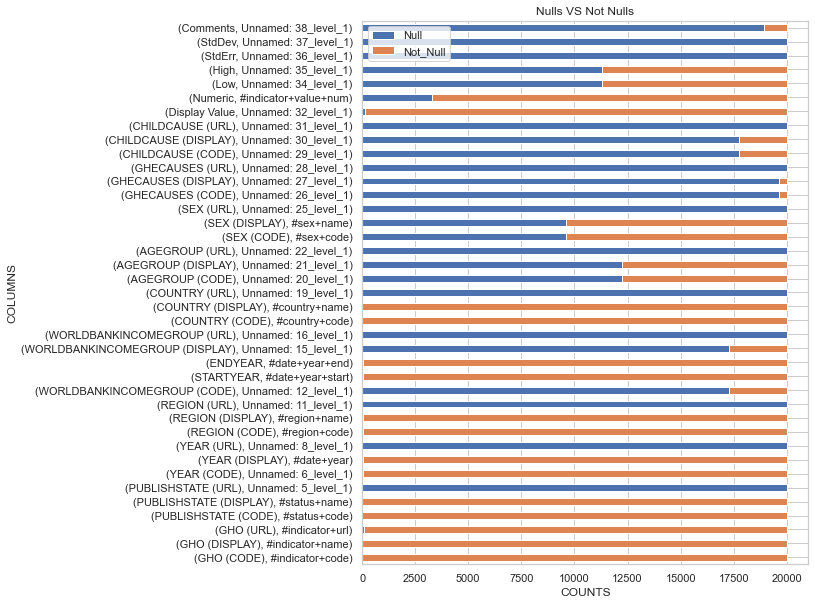

In [88]:
# Combo the 2 Series into 1 Dataframe
df_null_vs_not_null_counts = pd.concat([null_counts, notnull_counts], 
                                       axis = 1)
df_null_vs_not_null_counts.columns = ['Null', 'Not_Null']

# Plot the stacked bar chart
df_null_vs_not_null_counts.plot(kind = 'barh', 
                                stacked = True,
                                figsize = (8,10))

# Add titles and labels
plt.title('Nulls VS Not Nulls')
plt.xlabel('COUNTS')
plt.ylabel('COLUMNS')
plt.show()

#* TODO - move the legend?

Let's check for # of unique values in each column
- HIGHER is better here ----------->
- Only ~1000 unique indicators

In [89]:
unique_counts = df.nunique()
print('type of unique_counts =', type(unique_counts))
print(unique_counts)

type of unique_counts = <class 'pandas.core.series.Series'>
GHO (CODE)                      #indicator+code          1320
GHO (DISPLAY)                   #indicator+name          1319
GHO (URL)                       #indicator+url            820
PUBLISHSTATE (CODE)             #status+code                1
PUBLISHSTATE (DISPLAY)          #status+name                1
PUBLISHSTATE (URL)              Unnamed: 5_level_1          0
YEAR (CODE)                     Unnamed: 6_level_1         95
YEAR (DISPLAY)                  #date+year                 95
YEAR (URL)                      Unnamed: 8_level_1          0
REGION (CODE)                   #region+code                3
REGION (DISPLAY)                #region+name                3
REGION (URL)                    Unnamed: 11_level_1         0
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1         1
STARTYEAR                       #date+year+start           76
ENDYEAR                         #date+year+end             76
WORLDBANKI

### BAR CHART
Plot a bar chart of the unique value counts

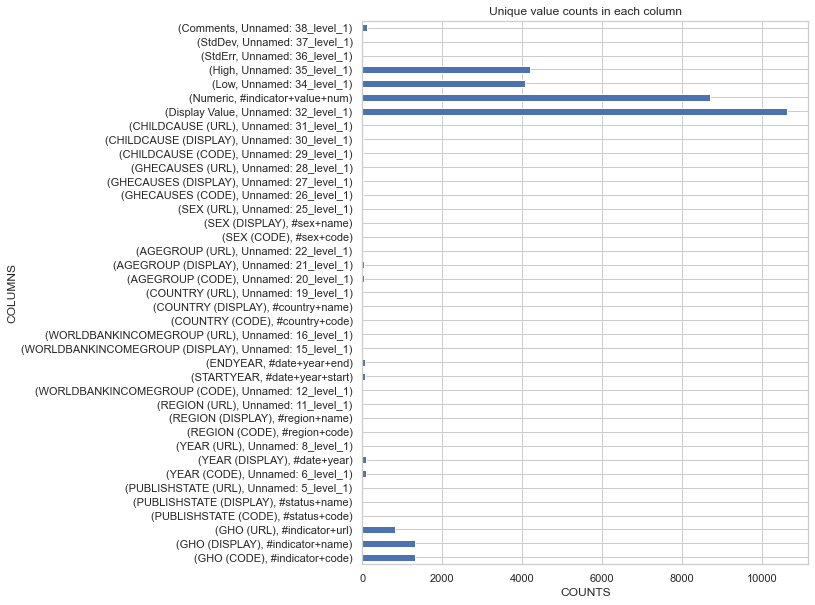

In [90]:
unique_counts.plot(kind = 'barh',
                   figsize = (8,10))

# Add titles and labels
plt.title('Unique value counts in each column')
plt.xlabel('COUNTS')
plt.ylabel('COLUMNS')
plt.show()

In [91]:
#* TODO - not sure if i should include this, delete?

# TEST
#df.iloc[:,1]

df.iloc[:,1].value_counts()

Deaths in children aged <5 years, by cause                                                                                     838
Deaths in children aged <5 years, by cause (per 1 000 live births)                                                             756
Distribution of causes of death among children aged < 5 years (%)                                                              756
Mean BMI (kg/m&#xb2;) (crude estimate)                                                                                         564
Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%)    378
                                                                                                                              ... 
Alcoholic beverage legally defined                                                                                               1
Adopted written national policy on alcohol                                         

# REFERENCE: 
- Get columns in a list format (header names)

In [92]:
#! ERROR - if using the top 2 rows as headers, then this breaks and counts letters 

# TEST
# print(df.columns)
# print('length of df.columns =', len(df.columns))

# Set counter
column_number = 0

# Start list
print('COL # | COL NAME')

# Iterate thru columns: print column # and name
while column_number < len(df.columns):
    print(f'{column_number} =', df.columns[column_number][0])
    column_number += 1

COL # | COL NAME
0 = GHO (CODE)
1 = GHO (DISPLAY)
2 = GHO (URL)
3 = PUBLISHSTATE (CODE)
4 = PUBLISHSTATE (DISPLAY)
5 = PUBLISHSTATE (URL)
6 = YEAR (CODE)
7 = YEAR (DISPLAY)
8 = YEAR (URL)
9 = REGION (CODE)
10 = REGION (DISPLAY)
11 = REGION (URL)
12 = WORLDBANKINCOMEGROUP (CODE)
13 = STARTYEAR
14 = ENDYEAR
15 = WORLDBANKINCOMEGROUP (DISPLAY)
16 = WORLDBANKINCOMEGROUP (URL)
17 = COUNTRY (CODE)
18 = COUNTRY (DISPLAY)
19 = COUNTRY (URL)
20 = AGEGROUP (CODE)
21 = AGEGROUP (DISPLAY)
22 = AGEGROUP (URL)
23 = SEX (CODE)
24 = SEX (DISPLAY)
25 = SEX (URL)
26 = GHECAUSES (CODE)
27 = GHECAUSES (DISPLAY)
28 = GHECAUSES (URL)
29 = CHILDCAUSE (CODE)
30 = CHILDCAUSE (DISPLAY)
31 = CHILDCAUSE (URL)
32 = Display Value
33 = Numeric
34 = Low
35 = High
36 = StdErr
37 = StdDev
38 = Comments


# FILTERING DATA

### Extracting values of interest

Column #1 = GHO (DISPLAY)
- REMEMBER: Python starts counting @0
- Column #1 contains the Global Health Indicators, let's look at those

Q) How many unique values in column 1?

In [93]:
column_1_unique = len(df.iloc[:,1].unique())
print('column_1_unique vals = ', column_1_unique)

column_1_unique vals =  1319


In [94]:
# Select column 1
column_1 = df.iloc[:,1]

# Then get only the unique values
column_1 = column_1.unique()

# Print them out
for row in column_1:
    print(row)

Age-standardized DALYs (per 100,000)
Distribution of years of life lost by major cause group
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)
Distribution of causes of death among children aged < 5 years (%)
Number of maternal deaths
Maternal mortality ratio (per 100 000 live births)
Stillbirth rate (per 1000 total births)
Life expectancy at age 60 (years)
nMx - age-specific death rate between ages x and x+n
ndx - number of people dying between ages x and x+n
nqx - probability of dying between ages x and x+n
lx - number of people left alive at age x
nLx - person-years lived between ages x and x+n
Tx - person-years lived above age x
ex - expectation of life at age x
Age-standardized NCD mortality rate  (per 100 000 population)
Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)
Number of deaths among children ages 5 to 9 years
Number of infant deaths (between birth and 11 months)
Infant mortality rate (between

In [95]:
# #* TODO - comment out after 1 run!!

# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\Humdata_col_1_unique-GHI.txt'

# # Save to a text file for easier reading
# with open(output_file_path, 'w+') as file:
    
#     # Iterate thru rows of column 1's unique values
#     for row in column_1:
        
#         #print(row)
#         file.write(f'{row}\n')

### QUESTIONS
- Which rows to keep?
- nMx, ndx, nqx, lx, nLx, Tx, ex --> what does these mean?
- NCD mortality? 
  - Noncommunicable diseases

# CLEANUP
Reimport DF 
- Give it a proper name
- Top 1 row as the header for simplicity later on (ignore the 2nd header row for now)
- Drop columns only if they are ENTIRELY EMPTY
  - Difference of 10 columns removed

In [96]:
df_gho = pd.read_csv(file_path, header = 0).dropna(axis = 1, how = 'all')
df_gho.head()

c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14,20,21,29,30,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),YEAR (CODE),YEAR (DISPLAY),REGION (CODE),REGION (DISPLAY),WORLDBANKINCOMEGROUP (CODE),...,SEX (DISPLAY),GHECAUSES (CODE),GHECAUSES (DISPLAY),CHILDCAUSE (CODE),CHILDCAUSE (DISPLAY),Display Value,Numeric,Low,High,Comments
0,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,NaN,#date+year,#region+code,#region+name,NaN,...,#sex+name,NaN,NaN,NaN,NaN,NaN,#indicator+value+num,NaN,NaN,NaN
1,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2000,2000,AMR,Americas,NaN,...,NaN,GHE060,Noncommunicable diseases,NaN,NaN,"20,107",20107.09961,NaN,NaN,NaN
2,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2012,2012,AMR,Americas,NaN,...,NaN,GHE000,All Causes,NaN,NaN,"22,775",22775.19922,NaN,NaN,NaN
3,WHS2_126,Distribution of years of life lost by major ca...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2012,2012,AMR,Americas,NaN,...,NaN,GHE151,Injuries,NaN,NaN,12,12.00000,NaN,NaN,NaN
4,WHOSIS_000004,Adult mortality rate (probability of dying bet...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2002,2002,AMR,Americas,NaN,...,Male,NaN,NaN,NaN,NaN,145,145.30790,NaN,NaN,NaN


In [97]:
# NOTE: STARTYEAR = col #10, ENDYEAR = col #11
# Compare if the STARTYEAR and ENDYEAR columns have the same year in each row
compare_years = df_gho.iloc[0:,10].eq(df_gho.iloc[0:,11])

# Fast check for BOTH T/F results
print('# of unique booleans =', compare_years.nunique()) 
print('compare_years = \n', compare_years)

# Set counter variables
count_trues = 0
count_falses = 0
length_counter = 0

# Iterate thru every row's T/F results
for row in compare_years:
    
    # CASE #1: STARTYEAR and ENDYEAR have same value
    if row == True:
        count_trues += 1
    
    # CASE #2: STARTYEAR and ENDYEAR are NOT the same (meaning year ranges)
    elif row == False:
        count_falses += 1
        
    # ALL CASES: Increment 1 just to count the total length
    length_counter += 1

# Print all counts
print('count_trues =', count_trues)
print('count_falses =', count_falses)
print('length of compare_years results =', length_counter)

# of unique booleans = 2
compare_years = 
 0        False
1         True
2         True
3         True
4         True
         ...  
20017     True
20018     True
20019     True
20020     True
20021     True
Length: 20022, dtype: bool
count_trues = 19935
count_falses = 87
length of compare_years results = 20022


# SUBSET
### Get the part of the DF where STARTYEAR and ENDYEAR are the same (no year ranges)
- This should match the # of trues from above (YES!)
- The 2nd header row was removed (unintended)

In [98]:
df_gho_single_years = df_gho[compare_years]

# CHECKS
print('shape of df_gho_single_years =', df_gho_single_years.shape)
df_gho_single_years.tail()

shape of df_gho_single_years = (19935, 28)


,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),YEAR (CODE),YEAR (DISPLAY),REGION (CODE),REGION (DISPLAY),WORLDBANKINCOMEGROUP (CODE),...,SEX (DISPLAY),GHECAUSES (CODE),GHECAUSES (DISPLAY),CHILDCAUSE (CODE),CHILDCAUSE (DISPLAY),Display Value,Numeric,Low,High,Comments
20017,NLIS_NU_CA_046,GDP per capita annual growth rate (%),NaN,PUBLISHED,Published,2014,2014,AMR,Americas,NaN,...,Both sexes,NaN,NaN,NaN,NaN,1.7,1.7,NaN,NaN,World Bank. DataBank: World development indica...
20018,NLIS_NU_CA_046,GDP per capita annual growth rate (%),NaN,PUBLISHED,Published,2015,2015,AMR,Americas,NaN,...,Both sexes,NaN,NaN,NaN,NaN,2.1,2.1,NaN,NaN,World Bank. DataBank: World development indica...
20019,NLIS_NU_CA_046,GDP per capita annual growth rate (%),NaN,PUBLISHED,Published,2016,2016,AMR,Americas,NaN,...,Both sexes,NaN,NaN,NaN,NaN,0.8,0.8,NaN,NaN,World Bank. DataBank: World development indica...
20020,NLIS_NU_CA_046,GDP per capita annual growth rate (%),NaN,PUBLISHED,Published,2017,2017,AMR,Americas,NaN,...,Both sexes,NaN,NaN,NaN,NaN,1.6,1.6,NaN,NaN,World Bank. DataBank: World development indica...
20021,NLIS_NU_CA_046,GDP per capita annual growth rate (%),NaN,PUBLISHED,Published,2018,2018,AMR,Americas,NaN,...,Both sexes,NaN,NaN,NaN,NaN,2.2,2.2,NaN,NaN,World Bank. DataBank: World development indica...


In [99]:
# #*(done) TODO - COMMENT OUT AFTER 1 RUN!!!

# # Export to CSV 

# #parent_file_path = os.path.dirname(current_path)
# df_gho_single_years_file_path = f'{parent_file_path}\\output\\Humdata_df_gho_single_years.csv'
# df_gho_single_years.to_csv(df_gho_single_years_file_path)

### Pearson Correlation within GHO DF
- NOTE - not sure if this is correct
  - Prof said not to use this

In [100]:
# pearson_corr = df_gho_single_years.corr()
# pearson_corr

In [101]:
#* TODO - DELETE
# # Create dummy variables 
# dummies = pd.get_dummies(df_gho_single_years['GHO (DISPLAY)'])

# # concatenate the original dataframe with the new dummy variable dataframe
# df_gho_single_years_dummies = pd.concat([df_gho, dummies], axis=1)

# # NOTE - columns expanded massively by > 1000
# print('df_gho_single_years_dummies =', df_gho_single_years_dummies.shape)
# df_gho_single_years_dummies.head()

In [102]:
# # NOTE - not sure if this is correct
# # Pearson Correlation within GHO DF with dummies

# pearson_corr = df_gho_single_years_dummies.corr()
# pearson_corr.head()

In [103]:
# # Find highest pairwise correlations
# corr_pairs = pearson_corr.unstack().sort_values(ascending = False).drop_duplicates()

# # Drop any perfect correlations (meaning 1.0)
# corr_pairs = corr_pairs[corr_pairs != 1.0]
# corr_pairs.head(50)

In [104]:
# # Plot correlation as a heatmap
# sns.heatmap(pearson_corr, 
#             annot = True, 
#             cmap = 'coolwarm')
# plt.show()

CORRELATION: 
- SHOULD pick numerical, exclude categorical
- give list of variables/cols to use
- DON'T do dummy variables for correlation

QUESTIONS

Q) can I just run this in R?

TODO - run correlation analysis between the 2 DF's? -- yes
- Is that necessary? Why does the GHO one have some DALYs but not all the ones in GHE? And GHE doesn't have the conditions or other indicator info

# TEST - OData API

### SOURCES:
- [GHO OData API](https://www.who.int/data/gho/info/gho-odata-api)
- [OData v2](https://www.odata.org/documentation/odata-version-2-0/uri-conventions/)
- [TDS](https://towardsdatascience.com/analyze-data-from-the-world-health-organization-global-health-observatory-723418d3642b)

GOAL:
- Obtain WHO Global Observatory (GO) records in JSON format with the GHO Odata API for IndicatorCode: NCDMORT3070

INDICATOR NAME: 
- Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.

DESCRIPTION:
- Convert the JSON records to a Python list of dictionaries. 
- Then, write select fields for records with a SpatialDimType of "COUNTRY" to the specified CSV output file.

SOURCE:
- https://towardsdatascience.com/analyze-data-from-the-world-health-organization-global-health-observatory-723418d3642b

In [105]:
# # IMPORTS
# import requests
# import json
# import csv

# class c_who_mortality_data:

#     def __init__(self, out_file_nm):

#         # Set the file name variable and create the parameters for the API request.
#         self.out_file_nm = out_file_nm
#         headers = {'Content-type': 'application/json'}

#         # Get data in JSON format and then write it to a CSV file.
#         data_list = self.get_data(headers)
#         self.write_data_to_csv(data_list)

#     def get_data(self, headers):
#         """  
#         Post the data request to the BLS API. Return the resulting JSON structure.
#         """
#         post = requests.post('https://ghoapi.azureedge.net/api/NCDMORT3070', headers = headers)
#         data = json.loads(post.text)
#         data_list = data['value']

#         return data_list

#     def write_data_to_csv(self, data_list):
#         """
#         Convert the data from a list of dictionaries --> CSV 
#         Write each record to the specified output file.
#         """
#         # Open the output file. 
#         # Then, set up the field names for the CSV records and set up the CSV writer.
#         with open(self.out_file_nm, 
#                   mode = 'w+', 
#                   newline = '') as data_file:

#             data_writer = csv.writer(data_file, 
#                                      delimiter = ',', 
#                                      quotechar = '"', 
#                                      quoting = csv.QUOTE_ALL)
            
#             # Write CSV file header.
#             header = ['country_code', 'year', 'sex', 'value']
#             data_writer.writerow(header)

#             # Write each record to the output file.
#             for record in data_list:

#                 spatial_dim_type = record['SpatialDimType']

#                 # Write COUNTRY records only. 
#                 # Exclude records for REGIONS, etc.
#                 # Get the fields of interest.
#                 if spatial_dim_type == 'COUNTRY':

#                     country_code = record['SpatialDim']
#                     year = record['TimeDim']
#                     sex_code = record['Dim1']
#                     sex = self.get_sex(sex_code)
#                     value = record['NumericValue']

#                     # Write the CSV record to the output file.
#                     record = [country_code, year, sex, value]
#                     data_writer.writerow(record)

#         data_file.close()

#     def get_sex(sef, sex_code):
#         """ 
#         Convert the sex code to a sex name.
#         """
#         sex = ''

#         if sex_code == 'FMLE':
#             sex = 'Female'
#         elif sex_code == 'MLE':
#             sex = 'Male'
#         elif sex_code == 'BTSX':
#             sex = 'Both Sexes'
#         else:
#            sex = 'Unknown'

#         return sex

In [106]:
# TEST OUTSIDE CLASS

# API URL static variables used to construct the API request
api_url_base    = 'https://ghoapi.azureedge.net/api/'
api_url_dims    = 'Dimension'
headers         = {'Content-type': 'application/json'}

# Print completed API URL 
print(f'test API URL construction = {api_url_base}{api_url_dims}')

test API URL construction = https://ghoapi.azureedge.net/api/Dimension


In [107]:
#* TODO - MOVE TO FUNCTION

# # API request components
# post        = requests.post(f'{api_url_base}{api_url_dims}/', headers = headers)
# data        = json.loads(post.text)
# data_list   = data['value']

# # Print truncated API request results
# print(f'data list = \n{data_list[0:5]} ... truncated')

In [108]:
def who_api(api_url_extras):
    """
    Summary:
        Input the desired API URL command as a string
        Returns the API request as a list type in JSON format

    Args:
        api_url_extras (string): the fully constructed API URL 

    Returns:
        list: JSON output in list format
    """
    
    # API request components
    post        = requests.post(f'{api_url_base}{api_url_extras}/', headers = headers)
    data        = json.loads(post.text)
    data_list   = data['value']
    
    # print(f'data list = {data_list[0:10]} ... truncated')
    
    return data_list

In [109]:
# TEST - just read the top
who_dimensions = who_api(api_url_dims)
who_dimensions[0:5]

[{'Code': 'ADVERTISINGTYPE', 'Title': 'SUBSTANCE_ABUSE_ADVERTISING_TYPES'},
 {'Code': 'AGEGROUP', 'Title': 'Age Group'},
 {'Code': 'ALCOHOLTYPE', 'Title': 'Beverage Types'},
 {'Code': 'AMRGLASSCATEGORY', 'Title': 'AMR GLASS Category'},
 {'Code': 'ARCHIVE', 'Title': 'Archive date'}]

In [110]:
# # Save JSON to file

# # Serializing json
# json_object = json.dumps(who_dimensions, indent=4)

# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\who_dimensions.json'
 
# # Writing to sample.json
# with open(output_file_path, "w+") as file:
#     file.write(json_object)

In [111]:
def json_save(list_of_json, output_file_path):
    """
    Summary:
        Intended to take the output of who_api() which is json in a list format
        Then create a JSON file in the given output file path location

    Args:
        list_of_json (list): json in a list format
        output_file_path (string): string of file path, name and extension of the resulting JSON file to be created
    """
    
    # Serializing json
    json_object = json.dumps(list_of_json, indent=4)
    
    # Writing to output file path 
    with open(output_file_path, "w+") as file:
        file.write(json_object)

In [112]:
# Set new file path for text output
output_file_path = f'{parent_file_path}\\output\\who_dimensions.json'

json_save(who_dimensions, output_file_path)

# * TODO - Which dimensions do I want?

    ALCOHOLTYPE
    AGEGROUP
    BACGROUP
    COUNTRY
    CHILDCAUSE
    CONSUMPTIONTYPE
    SEX
    TIMEPERIOD
    WEALTHDECILE
    YEAR

Let's start with `COUNTRY` first???

WHO GHO DALYs

DALY definition:
-  "One DALY represents the loss of the equivalent of one year of full health. DALYs for a disease or health condition are the sum of the years of life lost to due to premature mortality (YLLs) and the years lived with a disability (YLDs) due to prevalent cases of the disease or health condition in a population."
- SOURCE: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/158#:~:text=Definition%3A-,One%20DALY%20represents%20the%20loss%20of%20the%20equivalent%20of%20one,health%20condition%20in%20a%20population. 


DATA SOURCE: 
- https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/global-health-estimates-leading-causes-of-dalys

In [113]:
def who_api_preformatted(preformatted_api_url):
    """
    Summary:
        Input a preformatted API URL as a string
        Returns the API request as a list type in JSON format

    Args:
        preformatted_api_url (string): the fully constructed API URL 

    Returns:
        list: JSON output in list format
    """
    
    # API request components
    post        = requests.post(f'{preformatted_api_url}')
    data        = json.loads(post.text)
    data_list   = data['value']
    
    # print(f'data list = {data_list[0:10]} ... truncated')
    
    return data_list

In [114]:
#! WARNING - you can't use this as a drop-in replacement for my who_api function
# This preformatted URL for grabbing the USA DALYs provided by the WHO
url_USA_DALY = r'https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20eq%20%272000%27'

#! WARNING - you can't use this as a drop-in replacement for my who_api function
# This preformatted URL for grabbing the USA DALYs provided by the WHO
# DECONSTRUCT THIS

https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?

&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc

&$select=
    DIM_COUNTRY_CODE,
    DIM_GHECAUSE_CODE,
    DIM_GHECAUSE_TITLE,
    DIM_YEAR_CODE,
    DIM_SEX_CODE,
    DIM_AGEGROUP_CODE,
    VAL_DALY_COUNT_NUMERIC,
    VAL_DEATHS_COUNT_NUMERIC,
    ATTR_POPULATION_NUMERIC,
    VAL_DALY_RATE100K_NUMERIC,
    VAL_DEATHS_RATE100K_NUMERIC

&$filter=FLAG_RANKABLE
    %20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA
    %27%20and
    %20DIM_SEX_CODE%20eq%20%27BTSX%27
    %20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27
    %20and%20DIM_YEAR_CODE%20eq%20%272000%27

In [115]:
# TEST

api_url_test = "https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'AIR_11')"

test = who_api_preformatted(api_url_test)
output_file_path = f'{parent_file_path}\\output\\test.json'
json_save(test, output_file_path)


In [116]:
# # TEST - just read the top - CAN'T
# who_USA_DALY = who_api_preformatted(url_USA_DALY)
# who_USA_DALY[0:5]

In [117]:
# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\who_USA_DALY.json'

# json_save(who_USA_DALY, output_file_path)

### [TODO]
- For now I'm just gonna download the JSON output directly from the link: 
- https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20eq%20%272000%27 
- and run it thru Beautiful JSON

### Import JSON into Pandas
- SOURCE: https://konbert.com/blog/convert-json-to-csv-in-python3-using-pandas 

NOTE:
- manually edited the original JSON text, it was originally in a dictonary format
- changed it to a list by removing the key

In [118]:
def json_to_csv_to_df(input_file_path, output_file_path):
    """
    Summary:
        Takes a JSON file and converts it to a CSV file
        Then loads it into Pandas as a DF

    Args:
        input_file_path (string): JSON file path
        output_file_path (string): CSV file path

    Returns:
        pd.dataframe: JSON converted to CSV and loaded into Pandas DF
    """
    
    # Load JSON file
    with open(input_file_path) as file:
        data = json.loads(file.read())
        
    # Normalize the JSON data
    df = pd.json_normalize(data)
    # df.head()

    # Export to CSV
    df.to_csv(output_file_path, 
              index = False)
    
    # Load my CSV into Pandas
    df = pd.read_csv(output_file_path)
    # df.head()
        
    return df

In [119]:
# Set file path to grab JSON file
input_file_path = f'{parent_file_path}\\output\\USA_DALY_download-my_edits.json'

# Set new file path to save my CSV 
output_file_path = f'{parent_file_path}\\output\\USA_DALY_download-my_edits.csv'

# Call JSON conversion function and save to new DF
df = json_to_csv_to_df(input_file_path, output_file_path)
df.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
1,USA,2000,ALLAges,BTSX,1140,282000000,Stroke,1177.50,3320540.0,61.00,172034.00
2,USA,2000,ALLAges,BTSX,680,282000000,"Trachea, bronchus, lung cancers",1241.37,3500671.0,55.71,157092.70
3,USA,2000,ALLAges,BTSX,1180,282000000,Chronic obstructive pulmonary disease,1291.42,3641802.0,48.87,137825.70
4,USA,2000,ALLAges,BTSX,950,282000000,Alzheimer disease and other dementias,549.50,1549598.0,30.01,84619.68


In [120]:
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions       = 2
Objects          = 1441
Shape            = (131, 11)
Rows             = 131
Columns          = 11


In [121]:
eda_null(df)

List of empty columns:
COL # | COL NAME
(no null columns detected)


### NOTES:
- limited country to USA again
- it's only 1 yr (2000) of data, would ideally want more years

### URL:
- https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20ge%20%272000%27

# NOTE:
- this kinda looks like SQL?
- changed eq 2000 to ge 2000 and I think it's working, new JSON file saved to output folder

### Changed download filter to >= the year 2000

In [122]:
# Set file path to grab JSON file
input_file_path = f'{parent_file_path}\\output\\USA_DALY_download-ge2000.json'

# Set new file path to save my CSV 
output_file_path = f'{parent_file_path}\\output\\USA_DALY_download-ge2000.csv'

# Call JSON conversion function and save to new DF
df = json_to_csv_to_df(input_file_path, output_file_path)
df.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.2
1,USA,2001,ALLAges,BTSX,1130,285000000,Ischaemic heart disease,3391.24,9665041.0,207.94,592640.8
2,USA,2002,ALLAges,BTSX,1130,287000000,Ischaemic heart disease,3330.55,9558671.0,203.74,584739.8
3,USA,2003,ALLAges,BTSX,1130,290000000,Ischaemic heart disease,3229.69,9366098.0,197.12,571639.9
4,USA,2004,ALLAges,BTSX,1130,292000000,Ischaemic heart disease,3054.78,8919968.0,185.27,540981.5


In [123]:
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions       = 2
Objects          = 28820
Shape            = (2620, 11)
Rows             = 2620
Columns          = 11


In [124]:
eda_null(df)

List of empty columns:
COL # | COL NAME
(no null columns detected)


In [125]:
# Get unique years 
unique_years = df['DIM_YEAR_CODE'].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2019 2010 2018 2011
 2012 2013 2015 2017 2016 2014]


### PLANNING
- Split DF by years
- Plot change of DALYs over each year
- Do I need to rearrange the DF?

In [126]:
#TEST
df[df['DIM_YEAR_CODE'] == 2000].head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
30,USA,2000,ALLAges,BTSX,1140,282000000,Stroke,1177.50,3320540.0,61.00,172034.00
39,USA,2000,ALLAges,BTSX,680,282000000,"Trachea, bronchus, lung cancers",1241.37,3500671.0,55.71,157092.70
70,USA,2000,ALLAges,BTSX,1180,282000000,Chronic obstructive pulmonary disease,1291.42,3641802.0,48.87,137825.70
99,USA,2000,ALLAges,BTSX,950,282000000,Alzheimer disease and other dementias,549.50,1549598.0,30.01,84619.68


In [127]:
# Sort order 1st in original DF
df_sorted_VAL_DALY_RATE100K_NUMERIC = df.sort_values('VAL_DALY_RATE100K_NUMERIC', ascending = False)
df_sorted_VAL_DALY_RATE100K_NUMERIC.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.2
1,USA,2001,ALLAges,BTSX,1130,285000000,Ischaemic heart disease,3391.24,9665041.0,207.94,592640.8
2,USA,2002,ALLAges,BTSX,1130,287000000,Ischaemic heart disease,3330.55,9558671.0,203.74,584739.8
3,USA,2003,ALLAges,BTSX,1130,290000000,Ischaemic heart disease,3229.69,9366098.0,197.12,571639.9
4,USA,2004,ALLAges,BTSX,1130,292000000,Ischaemic heart disease,3054.78,8919968.0,185.27,540981.5


In [128]:
# Subset the DF by year
df_sorted_VAL_DALY_RATE100K_NUMERIC_2000 = df_sorted_VAL_DALY_RATE100K_NUMERIC[df_sorted_VAL_DALY_RATE100K_NUMERIC['DIM_YEAR_CODE'] == 2000]
df_sorted_VAL_DALY_RATE100K_NUMERIC_2000.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
70,USA,2000,ALLAges,BTSX,1180,282000000,Chronic obstructive pulmonary disease,1291.42,3641802.0,48.87,137825.70
39,USA,2000,ALLAges,BTSX,680,282000000,"Trachea, bronchus, lung cancers",1241.37,3500671.0,55.71,157092.70
30,USA,2000,ALLAges,BTSX,1140,282000000,Stroke,1177.50,3320540.0,61.00,172034.00
1410,USA,2000,ALLAges,BTSX,1380,282000000,Back and neck pain,1169.42,3297767.0,0.17,483.31


Plot year data for before and after as a bar plot
- SOURCE: https://www.geeksforgeeks.org/data-visualization-with-python-seaborn/

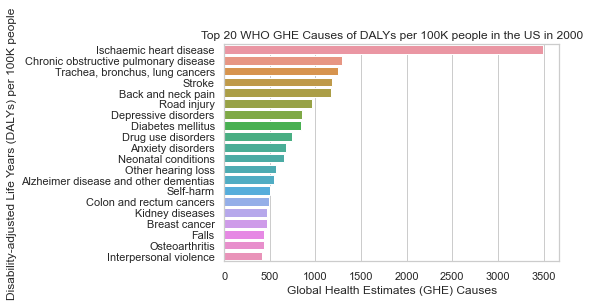

In [129]:
# Set style
sns.set(style = "whitegrid")
   
# Plot in Seaborn
plot = sns.barplot(data = df_sorted_VAL_DALY_RATE100K_NUMERIC[df_sorted_VAL_DALY_RATE100K_NUMERIC['DIM_YEAR_CODE'] == 2000].head(20),
                   x    = 'VAL_DALY_RATE100K_NUMERIC',
                   y    = 'DIM_GHECAUSE_TITLE')

# Add labels
plot.set(xlabel = 'Global Health Estimates (GHE) Causes', 
         ylabel = 'Disability-adjusted Life Years (DALYs) per 100K people',
         title  = 'Top 20 WHO GHE Causes of DALYs per 100K people in the US in 2000')

plt.show()

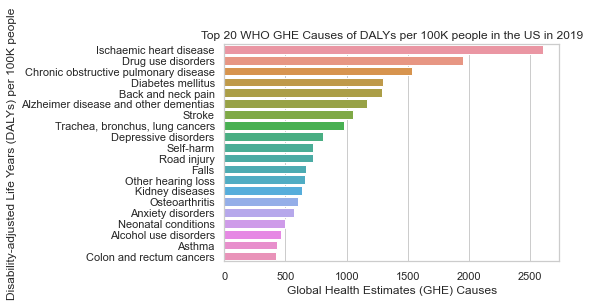

In [130]:
# Set style
sns.set(style = "whitegrid")

# Set some variables
year = 2019
   
# Plot in Seaborn
plot = sns.barplot(data = df_sorted_VAL_DALY_RATE100K_NUMERIC[df_sorted_VAL_DALY_RATE100K_NUMERIC['DIM_YEAR_CODE'] == year].head(20),
                   x    = 'VAL_DALY_RATE100K_NUMERIC',
                   y    = 'DIM_GHECAUSE_TITLE')

# Add labels
plot.set(xlabel = 'Global Health Estimates (GHE) Causes', 
         ylabel = 'Disability-adjusted Life Years (DALYs) per 100K people',
         title  = f'Top 20 WHO GHE Causes of DALYs per 100K people in the US in {year}')

plt.show()

In [131]:
# Subset by:
# - Sorting by DALY_RATE100K (descending order)
# - Then, filtering by years: 2000 OR 2019
# - Lastly, head to take just the top X rows you want
# NOTE: this will mix the rows of the years included, so it will be the top X from all the years, when plotting later it can be empty if not in the top X years

df_sorted_VAL_DALY_RATE100K_NUMERIC_2000_and_2019 = df_sorted_VAL_DALY_RATE100K_NUMERIC[(df_sorted_VAL_DALY_RATE100K_NUMERIC['DIM_YEAR_CODE'] == 2000) | (df_sorted_VAL_DALY_RATE100K_NUMERIC['DIM_YEAR_CODE'] == 2019)]
df_sorted_VAL_DALY_RATE100K_NUMERIC_2000_and_2019.head(5)

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
10,USA,2019,ALLAges,BTSX,1130,329000000,Ischaemic heart disease,2605.20,8571094.0,153.47,504903.90
114,USA,2019,ALLAges,BTSX,870,329000000,Drug use disorders,1948.81,6411582.0,22.62,74434.62
32,USA,2019,ALLAges,BTSX,1180,329000000,Chronic obstructive pulmonary disease,1535.80,5052790.0,59.39,195387.00
163,USA,2019,ALLAges,BTSX,800,329000000,Diabetes mellitus,1299.41,4275075.0,18.67,61418.24


Plot barplots side-by-side
- SOURCE: https://seaborn.pydata.org/examples/grouped_barplot.html

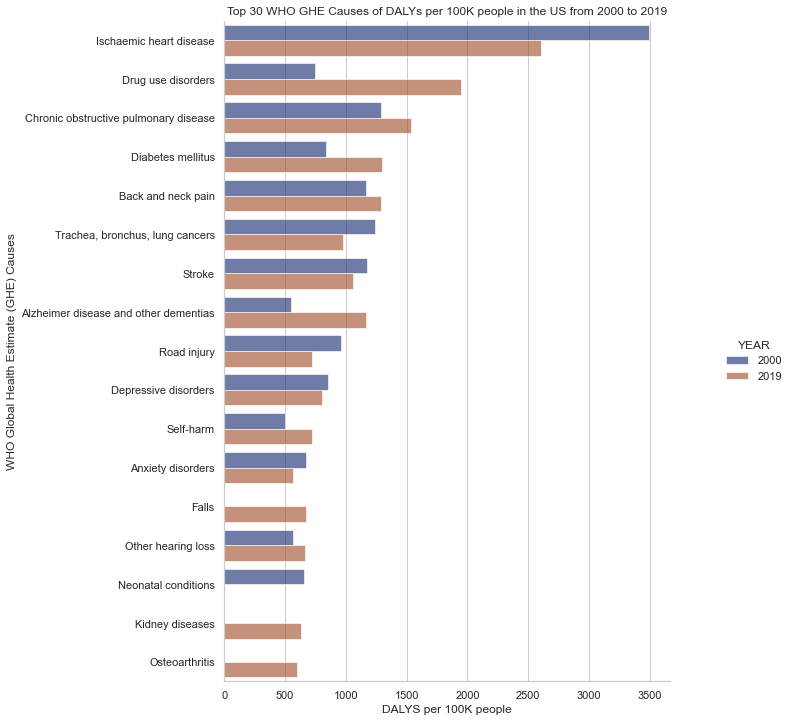

In [132]:
# Set theme
sns.set_theme(style="whitegrid")

# Set year variables
year_start = 2000
year_end = 2019

# Draw a nested barplot by species and sex
plot = sns.catplot(
    data    = df_sorted_VAL_DALY_RATE100K_NUMERIC_2000_and_2019.head(30), 
    kind    = 'bar',
    x       = 'VAL_DALY_RATE100K_NUMERIC',
    y       = 'DIM_GHECAUSE_TITLE',
    hue     = 'DIM_YEAR_CODE',
    palette = "dark", 
    alpha   = .6, 
    height  = 10)
plot.set(title = f'Top 30 WHO GHE Causes of DALYs per 100K people in the US from {year_start} to {year_end}')
plot.set_axis_labels('DALYS per 100K people', 'WHO Global Health Estimate (GHE) Causes')
plot.legend.set_title('YEAR')

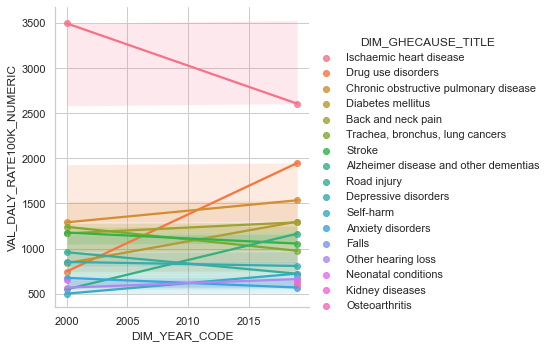

In [136]:
# Use Seaborn to plot regression
sns.lmplot(data = df_sorted_VAL_DALY_RATE100K_NUMERIC_2000_and_2019.head(30),
            y = 'VAL_DALY_RATE100K_NUMERIC',
            hue = 'DIM_GHECAUSE_TITLE',
            x = 'DIM_YEAR_CODE'
            )

# TODO

Relationship correlation betw 2 variables over multiple years (trends)
- do regression analysis over every year
- don't use time-series for health data

TODO - can I make a function to auto plot every year?
TODO - need to bring in data from the other API too
TODO - might need to join them and create dummy variables took
TODO - correlation analysis?

TODO
- pick 1 condition to use like ischaemic heart disease
- add feature count for each col, check for nan/nulls tho
- viz for missing values 
- viz for dupes
- pie chart?
- IQR?
- feature importance
- regplot (regression)


from Abdul
- You can try Label Encoding instead of onehot Encoding(Dummay Vars)
- https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/


mutual information method instead of correlation matrix

Plotly express is easier than regular Plotly

CHECK:
- calc % of null values using lambda function
  - then turn into a sns.heatmap
- data distribution
- outliers + trimming
- IQR
- split data in categorical/numerical, but how to decide?

In [ ]:
# TEST
for year in unique_years:
    print('year =', year)
    data = df[df['DIM_YEAR_CODE'] == year]
    print('data =', data)

year = 2000
data =      DIM_COUNTRY_CODE  DIM_YEAR_CODE DIM_AGEGROUP_CODE DIM_SEX_CODE  \
0                 USA           2000           ALLAges         BTSX   
30                USA           2000           ALLAges         BTSX   
39                USA           2000           ALLAges         BTSX   
70                USA           2000           ALLAges         BTSX   
99                USA           2000           ALLAges         BTSX   
...               ...            ...               ...          ...   
2598              USA           2000           ALLAges         BTSX   
2599              USA           2000           ALLAges         BTSX   
2600              USA           2000           ALLAges         BTSX   
2604              USA           2000           ALLAges         BTSX   
2605              USA           2000           ALLAges         BTSX   

      DIM_GHECAUSE_CODE  ATTR_POPULATION_NUMERIC  \
0                  1130                282000000   
30                 1140 

# (GENERAL) QUESTIONS:
1) Do I need to include a download script thru Jupyter Notebook?
2) Where to create requirements.txt?   